In [1]:
%pylab inline
import torch
import numpy
import sklearn.datasets
import torchvision.datasets

random.seed(0)
torch.manual_seed(0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Fetching dataset
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)
# mnist = sklearn.datasets.fetch_mldata('MNIST original')

Processing...
Done!


In [3]:
train_features = MNIST_train.train_data
train_labels = MNIST_train.train_labels
test_features = MNIST_test.test_data
test_labels = MNIST_test.test_labels

5


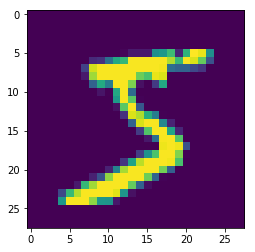

In [5]:
imshow(train_features[0, :, :].numpy())
print(train_labels[0])

0


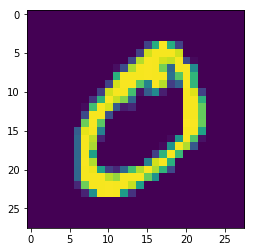

In [6]:
imshow(train_features[1, :, :].numpy())
print(train_labels[1])

In [7]:
train_features = train_features.numpy()
test_features = test_features.numpy()
train_labels = train_labels.numpy()
test_labels = test_labels.numpy()

train_features = train_features.reshape([-1, 28 * 28]).astype(float)
test_features = test_features.reshape([-1, 28 * 28]).astype(float)

In [9]:
# Всего 10 классов
class MnistNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MnistNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x

In [10]:
mnist_net = MnistNet(100)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [11]:
batch_size = 100
for epoch in range(20):
    order = random.permutation(train_features.shape[0])
    for start_index in range(0, train_features.shape[0], batch_size):
        optimizer.zero_grad()
        
        batch_indice = order[start_index:start_index+batch_size]
        batch_features = torch.FloatTensor(train_features[batch_indice, :])
        batch_labels = torch.LongTensor(train_labels[batch_indice])
        
        features_var = torch.autograd.Variable(batch_features)
        labels_var = torch.autograd.Variable(batch_labels)
        
        preds_var = mnist_net.forward(features_var)
        loss = criterion(preds_var, labels_var)
        
        loss.backward()
        
        optimizer.step()
        
    order = random.permutation(test_features.shape[0])
    
    all_preds = []
    all_trues = []
    for start_index in range(0, test_features.shape[0], batch_size):
        batch_indice = order[start_index:start_index+batch_size]
        batch_features = torch.FloatTensor(test_features[batch_indice, :])
        trues = test_labels[batch_indice]
        
        features_var = torch.autograd.Variable(batch_features)
        
        preds = mnist_net.forward(features_var).data.numpy().argmax(axis=1)
        
#         print preds.shape
#         print trues.shape
        
        all_preds.append(preds)
        all_trues.append(trues)
        
    all_preds = numpy.concatenate(all_preds)
    all_trues = numpy.concatenate(all_trues)
    
    print((all_preds == all_trues).sum() / float(all_trues.size))

0.9104
0.9164
0.9227
0.9252
0.9301
0.9258
0.9303
0.9313
0.9322
0.934
0.9321
0.9293
0.9356
0.9347
0.9319
0.9342
0.9324
0.9358
0.9391
0.9384
0.9406
0.9395
0.9407
0.9429
0.9403


KeyboardInterrupt: 

# Задание 1
Подобрать параметры Adam, при котором достигается наибольшая точность модели.

# Задание 2
Сделать обучение такой же модели для CIFAR-10. Модель изменить в зависимости от предпочтений, добавить оптимизатор по вкусу.